In [1]:
#Initially required imports

import os
import numpy as np
from PIL import Image
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
# Define the directory containing the images
dir_path = './train'

# Load the image filenames
filenames = ['{:06d}.jpg'.format(i) for i in range(0, 10000)]

# Load the images into a list
images = []
for filename in filenames:
    # Construct the full path to the image
    filepath = os.path.join(dir_path, filename)
    # Load the image
    img = Image.open(filepath)
    # Convert into numpy array
    img_array = np.array(img)
    images.append(img_array)

# Opening the file for reading
with open('train.txt', 'r') as f:
    train_labels = f.read().splitlines()
# All labels 
labels = []
for label in train_labels:
    temp = int(label[-1])
    labels.append(temp)

# Convering into numpy array
images_array = np.array(images)
labels = np.array(labels) 

# Scalling the raw images
images_array = images_array/255

# Split the data into training and test sets on 80% training and 20% test 
n_samples = len(images_array)
X_train = images_array[:round(.8 * n_samples)]
y_train = labels[:round(.8 * n_samples)]
X_test = images_array[round(.8 * n_samples):]
y_test =labels[round(.8 * n_samples):]

In [3]:
#First CNN model
cnn_1 = models.Sequential([
    # Convolutional layers with kernel, MaxPolling and Relu as activation funtion
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),

    # dense layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(8,activation = 'softmax')
])

# Compiling the model
cnn_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn_1.fit(X_train, y_train, epochs = 15, validation_data=(X_test, y_test))
accuracy_test = cnn_1.evaluate(X_test, y_test)

print(accuracy_test)


Epoch 1/15
250/250 [==============================] - 5s 15ms/step - loss: 1.1581 - accuracy: 0.5890 - val_loss: 0.8682 - val_accuracy: 0.7100
Epoch 2/15
250/250 [==============================] - 3s 12ms/step - loss: 0.7546 - accuracy: 0.7305 - val_loss: 0.7940 - val_accuracy: 0.7450
Epoch 3/15
250/250 [==============================] - 4s 14ms/step - loss: 0.6802 - accuracy: 0.7556 - val_loss: 0.6782 - val_accuracy: 0.7685
Epoch 4/15
250/250 [==============================] - 4s 14ms/step - loss: 0.6069 - accuracy: 0.7875 - val_loss: 0.6508 - val_accuracy: 0.7640
Epoch 5/15
250/250 [==============================] - 3s 13ms/step - loss: 0.5773 - accuracy: 0.7945 - val_loss: 0.6153 - val_accuracy: 0.7885
Epoch 6/15
250/250 [==============================] - 3s 12ms/step - loss: 0.5160 - accuracy: 0.8215 - val_loss: 0.5905 - val_accuracy: 0.7900
Epoch 7/15
250/250 [==============================] - 3s 14ms/step - loss: 0.4790 - accuracy: 0.8301 - val_loss: 0.5275 - val_accuracy: 0.8275

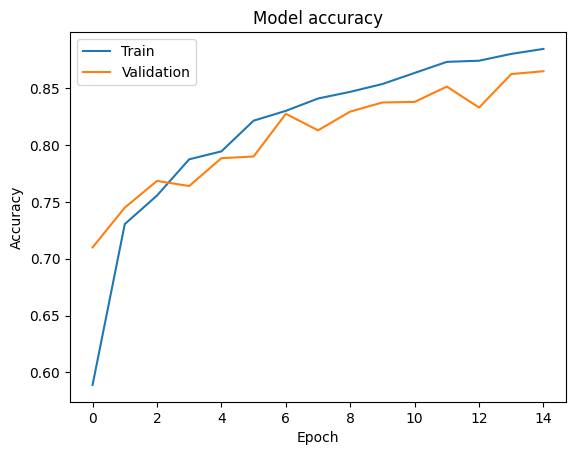

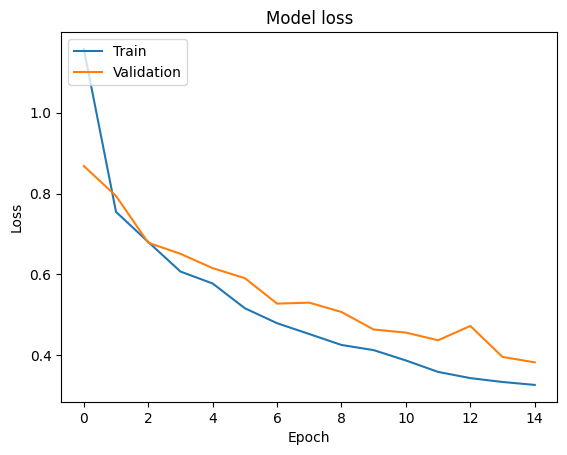

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:

cnn_2 = models.Sequential([
    # Convolutional layers with kernel, MaxPolling and Relu as activation funtion
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    # dense layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(8,activation = 'softmax')
])

# Compiling the model
cnn_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# history keeps data for plotting graphs
history = cnn_2.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))
accuracy_test = cnn_2.evaluate(X_test, y_test)

print(accuracy_test)


Epoch 1/30
250/250 [==============================] - 7s 26ms/step - loss: 1.1488 - accuracy: 0.5694 - val_loss: 0.8648 - val_accuracy: 0.7050
Epoch 2/30
250/250 [==============================] - 6s 24ms/step - loss: 0.7414 - accuracy: 0.7347 - val_loss: 0.7435 - val_accuracy: 0.7570
Epoch 3/30
250/250 [==============================] - 7s 28ms/step - loss: 0.6044 - accuracy: 0.7930 - val_loss: 0.6125 - val_accuracy: 0.7895
Epoch 4/30
250/250 [==============================] - 7s 29ms/step - loss: 0.5255 - accuracy: 0.8196 - val_loss: 0.5486 - val_accuracy: 0.8185
Epoch 5/30
250/250 [==============================] - 6s 24ms/step - loss: 0.4571 - accuracy: 0.8432 - val_loss: 0.5820 - val_accuracy: 0.8005
Epoch 6/30
250/250 [==============================] - 5s 22ms/step - loss: 0.4190 - accuracy: 0.8551 - val_loss: 0.4986 - val_accuracy: 0.8290
Epoch 7/30
250/250 [==============================] - 6s 26ms/step - loss: 0.3950 - accuracy: 0.8547 - val_loss: 0.4693 - val_accuracy: 0.8400

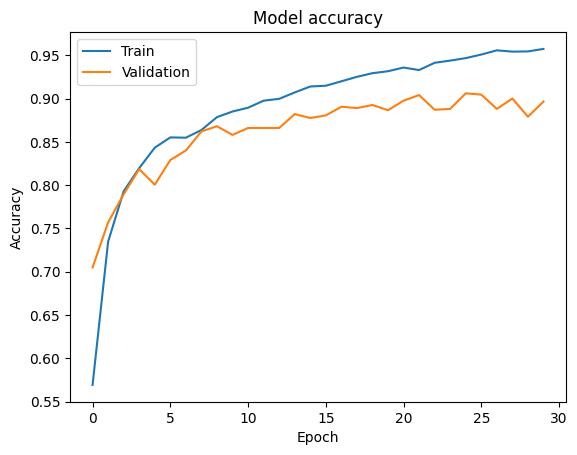

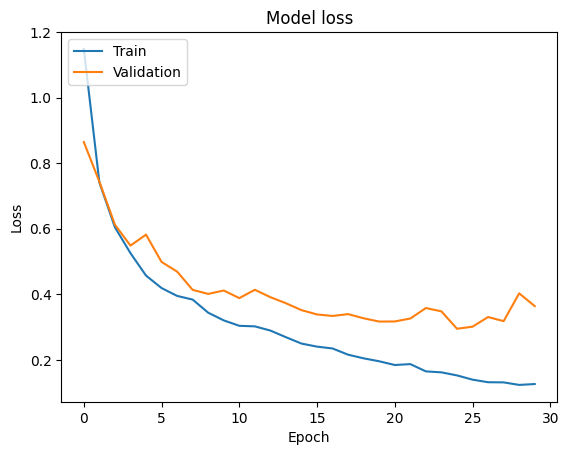

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
cnn_3 = models.Sequential([
    # Convolutional layers with kernel, MaxPolling and Relu as activation funtion
    layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same',activation = 'relu', input_shape = (28,28,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    # dense layers
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(8,activation = 'softmax')
])

# Compiling the model
cnn_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# history keeps data for plotting graphs
history = cnn_3.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))
accuracy_test = cnn_3.evaluate(X_test, y_test)

print(accuracy_test)


Epoch 1/50
250/250 [==============================] - 14s 50ms/step - loss: 1.1247 - accuracy: 0.5822 - val_loss: 0.7028 - val_accuracy: 0.7515
Epoch 2/50
250/250 [==============================] - 12s 49ms/step - loss: 0.6448 - accuracy: 0.7611 - val_loss: 0.6289 - val_accuracy: 0.7570
Epoch 3/50
250/250 [==============================] - 12s 49ms/step - loss: 0.5330 - accuracy: 0.8021 - val_loss: 0.4929 - val_accuracy: 0.8140
Epoch 4/50
250/250 [==============================] - 14s 58ms/step - loss: 0.4623 - accuracy: 0.8227 - val_loss: 0.4293 - val_accuracy: 0.8405
Epoch 5/50
250/250 [==============================] - 12s 50ms/step - loss: 0.4048 - accuracy: 0.8465 - val_loss: 0.4394 - val_accuracy: 0.8420
Epoch 6/50
250/250 [==============================] - 12s 50ms/step - loss: 0.3474 - accuracy: 0.8733 - val_loss: 0.3636 - val_accuracy: 0.8720
Epoch 7/50
250/250 [==============================] - 12s 48ms/step - loss: 0.3218 - accuracy: 0.8777 - val_loss: 0.4972 - val_accuracy:

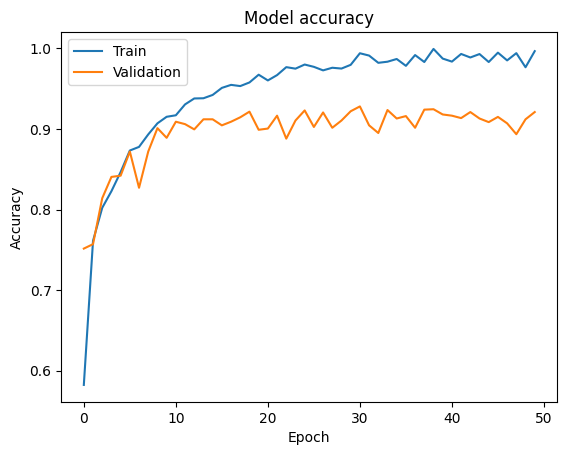

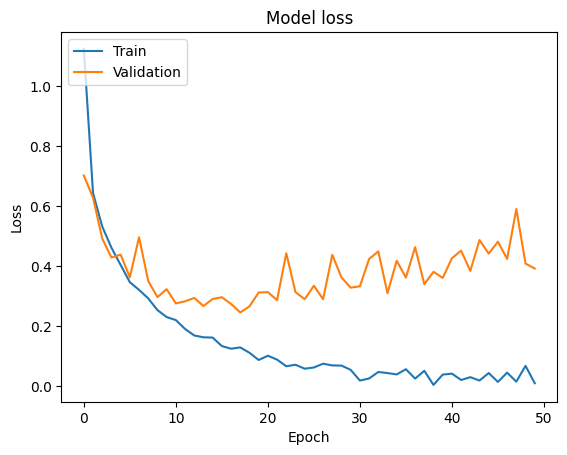

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
prediction_cnn_3 = cnn_3.predict(X_test)
pred_class_cnn_3 = [np.argmax(element) for element in prediction_cnn_3]
print("Classification Report: \n", classification_report(y_test, pred_class_cnn_3))

63/63 [==============================] - 1s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       139
           1       0.99      0.98      0.98       372
           2       0.94      0.88      0.91       202
           3       0.83      0.84      0.84       335
           4       0.85      0.94      0.89       141
           5       0.79      0.86      0.82       149
           6       0.97      0.96      0.96       413
           7       1.00      0.98      0.99       249

    accuracy                           0.92      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000



Text(83.22222222222221, 0.5, 'Truth')

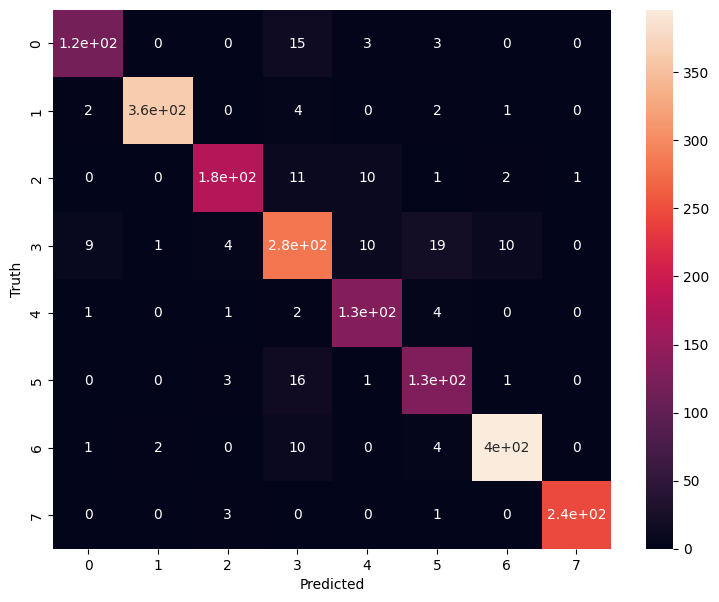

In [10]:
cm_cnn_3 = confusion_matrix(y_test, pred_class_cnn_3)
import seaborn as sn
plt.figure(figsize = (9,7))
sn.heatmap(cm_cnn_3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
from keras.models import load_model

cnn_3.save('Final_Model.h5')
Final_CNN = load_model('Final_Model.h5')


In [12]:
# Path to the test image directory 
dir_path = './test'

# Load the image filenames
filenames = ['{:05d}.jpg'.format(i) for i in range(0, 5000)]

# Load the images into a list
test_images = []
for filename in filenames:
    # Construct the full path to the image
    filepath = os.path.join(dir_path, filename)
    # Load the image
    img = Image.open(filepath)
    img_array = np.array(img)
    test_images.append(img_array)

# Converting into a numpy array
test_images = np.array(test_images)

# Scalling the data 
test_images = test_images/255


In [13]:

test_prediction= Final_CNN.predict(test_images)
test_pred_class = [np.argmax(element) for element in test_prediction]

index = 0
with open("test.txt", "w") as f:
    for i in range(5000):
        text = f"test/{str(index).zfill(5)}.jpg"
        value = test_pred_class[i]
        output = f"{text} {value}"
        index = index+1
        f.write(output + "\n")



157/157 [==============================] - 2s 15ms/step


In [15]:
# Training data for KNN and Logistic Regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Converting into 1D array
images_array_flat = images_array.reshape(images_array.shape[0], -1)

# Training KNN
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=15, weights='distance')
knn_clf.fit(X_train_flat, y_train)
prediction_knn = knn_clf.predict(X_test_flat)

accuracy = metrics.accuracy_score(y_test, prediction_knn)
cvs = cross_val_score(knn_clf, images_array_flat, labels, cv=5, scoring="accuracy")

print(accuracy)
print(cvs)

0.7565
[0.7535 0.7555 0.757  0.7525 0.762 ]


In [16]:
print("Classification Report: \n", classification_report(y_test, prediction_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.45      0.54       139
           1       0.80      0.86      0.83       372
           2       0.77      0.72      0.74       202
           3       0.61      0.70      0.65       335
           4       0.65      0.77      0.71       141
           5       0.53      0.73      0.61       149
           6       0.95      0.69      0.80       413
           7       0.96      1.00      0.98       249

    accuracy                           0.76      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.78      0.76      0.76      2000



Text(83.22222222222221, 0.5, 'Truth')

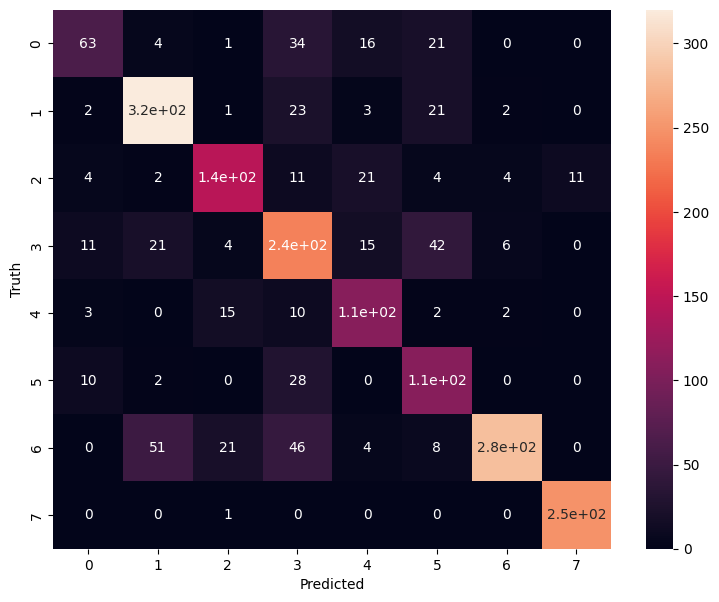

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,  prediction_knn)
import seaborn as sn
plt.figure(figsize = (9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# Train the model on the training data
from sklearn.linear_model import LogisticRegression
Logistic_Reg= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=2000, random_state=42)

Logistic_Reg.fit(X_train_flat, y_train)

score = Logistic_Reg.score(X_test_flat, y_test)
print(score)
prediction_log_reg = Logistic_Reg.predict(X_test_flat)
print("Classification Report: \n", classification_report(y_test, prediction_log_reg))

0.7915
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       139
           1       0.93      0.91      0.92       372
           2       0.78      0.80      0.79       202
           3       0.62      0.66      0.64       335
           4       0.69      0.76      0.73       141
           5       0.57      0.55      0.56       149
           6       0.86      0.81      0.84       413
           7       0.98      0.98      0.98       249

    accuracy                           0.79      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.79      0.79      0.79      2000



C:\Users\nayee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
prediction_log_reg = Logistic_Reg.predict(X_test_flat)
print("Classification Report: \n", classification_report(y_test, prediction_log_reg))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       139
           1       0.93      0.91      0.92       372
           2       0.78      0.80      0.79       202
           3       0.62      0.66      0.64       335
           4       0.69      0.76      0.73       141
           5       0.57      0.55      0.56       149
           6       0.86      0.81      0.84       413
           7       0.98      0.98      0.98       249

    accuracy                           0.79      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.79      0.79      0.79      2000



Text(83.22222222222221, 0.5, 'Truth')

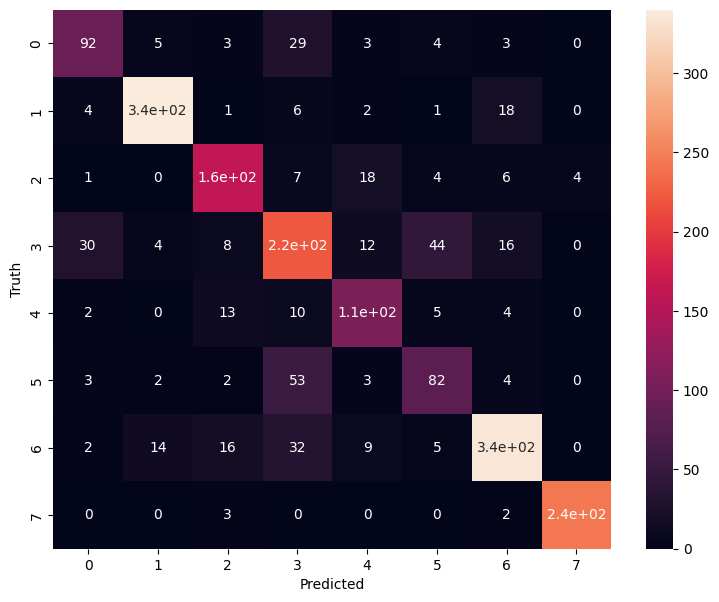

In [21]:
cm = confusion_matrix(y_test,  prediction_log_reg)
import seaborn as sn
plt.figure(figsize = (9,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')